In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
data=pd.read_csv("./MLD.csv")
data.head(1)

,WEIGHT(N),HEIGHT(mm),HEAD CIRCUMFERENCE(mm),SHOULDER BREADTH(mm),HAND LENGTH(mm),CHEST CIRCUMFERENCE(mm),WAIST CIRCUMFERENCE(mm),SLEEVE LENGTH(mm),AGE (months)
0,256,1278,505,298,138,602,553,352.0,120


In [3]:
Y=data['CHEST CIRCUMFERENCE(mm)']
X=data.drop(['WEIGHT(N)','HEAD CIRCUMFERENCE(mm)','HAND LENGTH(mm)','CHEST CIRCUMFERENCE(mm)','AGE (months)'],axis=1)



del data
X=np.array(X).astype(np.float32)
Y=np.array(Y).astype(np.float32)

x_train=X[:1000,:]
x_valid=X[1001:1050,:]
x_test=X[1051:1078,:]

Y_train=Y[:1000]
Y_valid=Y[1001:1050]
Y_test=Y[1051:1078]

In [4]:
x_train.shape

(1000, 4)

In [5]:
#normalize features
def normalize_data(features):
    mean=np.mean(features,axis=0)
    std=np.std(features,axis=0)
    return (features-mean)/std

In [6]:
x_train=normalize_data(x_train)
x_valid=normalize_data(x_valid)
x_test=normalize_data(x_test)

In [7]:
x_train[0]

array([-2.11990666, -1.92803991, -1.51399922, -1.87128031], dtype=float32)

In [8]:
#reshape the feature and labels
def data_reshape(features,labels):
    n_samples=features.shape[0]
    n_dim=features.shape[1]
    f=np.reshape(np.c_[np.ones(n_samples),features],[n_samples,n_dim + 1])
    l=np.reshape(labels,[n_samples,1])
    return f,l
    

In [9]:
train_dataset,train_labels=data_reshape(x_train,Y_train)
valid_dataset,valid_labels=data_reshape(x_valid,Y_valid)
test_dataset,test_labels=data_reshape(x_test,Y_test)

In [10]:
train_dataset[0]

array([ 1.        , -2.11990666, -1.92803991, -1.51399922, -1.87128031])

In [11]:
#initialize Graph
dim=train_dataset.shape[1]
num_labels=1 #prediction

graph=tf.Graph()
with graph.as_default():
    # Placeholder and variable
    tf_train_dataset=tf.placeholder(tf.float32,shape=(None,dim))
    tf_train_labels=tf.placeholder(tf.float32,shape=(None,1))
    tf_valid_dataset=tf.constant(valid_dataset)
    tf_test_dataset=tf.constant(test_dataset)
    
    
    #weights and biases
    w1=tf.Variable(tf.truncated_normal(shape=[dim,num_labels],stddev=0.1))
    b1=tf.Variable(tf.ones([num_labels]))
    
    
    #model computation
    def model(dataset):
        regr=tf.nn.relu(tf.matmul(tf.cast(dataset,tf.float32),w1)+b1)
        return regr
    
    #loss
    Y_=model(tf_train_dataset)
    loss=tf.reduce_mean(tf.square(Y_ - tf_train_labels))
    
    #optimize the loss
    optimize=tf.train.GradientDescentOptimizer(0.03).minimize(loss)
    
    #predict the value
    pred_train=Y_
    pred_valid=model(tf_valid_dataset)
    pred_test=model(tf_test_dataset)
    
    

In [12]:
#run till epoch=101
epochs=1001
cost_history = np.empty(shape=[1],dtype=float)


with tf.Session(graph=graph) as sess:
    tf.global_variables_initializer().run()
    print("Initialization done--------------------")
    feed_dict={tf_train_dataset:train_dataset,tf_train_labels:train_labels}
    for step in range(epochs):
        opt,l,pred=sess.run([optimize,loss,pred_train],feed_dict=feed_dict)
        cost_history=np.append(cost_history,l)
        if(step%100==0):
            print("loss at step %d:%f" %(step,l))


Initialization done--------------------
loss at step 0:634133.250000
loss at step 100:785.291565
loss at step 200:767.574890
loss at step 300:764.769775
loss at step 400:764.316589
loss at step 500:764.242249
loss at step 600:764.229675
loss at step 700:764.226990
loss at step 800:764.226196
loss at step 900:764.225647
loss at step 1000:764.225098


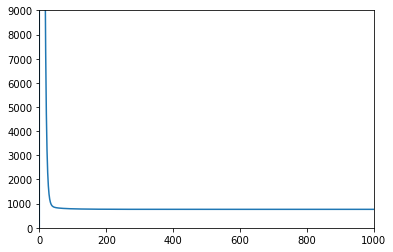

In [18]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,epochs,0,9000])
plt.show()